In [2]:
import pandas as pd #used for working with dataframes—our dataset
import numpy as np #used to manipulate arrays
import matplotlib.pyplot as plt #for making visuals
import seaborn as sns #for making visuals too

In [20]:
US_19=pd.read_csv(r"C:\Users\melinadiaz\Documents\GitHub\nmurx_us_19Q1.csv")

In [24]:
US_19.head()

,DATE,STATUS,QLANG,DEM_GENDER,DEM_AGE,DEM_POSTAL,DEM_REGION,DEM_INCOME,DEM_HOME,DEM_GENHEALTH,...,ILLXCAN_YR,ILLXCAN_NTY,ILLXCAN_MNTH,ILLXCAN_WK,ILL_USE,ILL_YR,ILL_NTY,ILL_MNTH,ILL_WK,WT
0,2019-03-27 14:16:02,3,1,2,51,782,3,4,3,2,...,0,0,0,0,1,1,1,1,0,7074.136133
1,2019-03-24 12:42:54,3,1,2,67,604,2,1,1,2,...,0,0,0,0,0,0,0,0,0,4069.460791
2,2019-03-21 08:56:26,3,1,2,71,339,3,4,2,4,...,0,0,0,0,0,0,0,0,0,7554.618118
3,2019-03-24 14:38:49,3,1,2,68,801,4,2,1,4,...,0,0,0,0,0,0,0,0,0,4178.061514
4,2019-03-24 12:26:53,3,1,2,69,612,2,2,2,4,...,0,0,0,0,0,0,0,0,0,7033.819350


Way too many columns, so let's narrow it down by figuring out what questions we want to ask and filtering them out.

Is marijuana a gateway drug? Are some drugs correlated with others? Is long term use correlated with others?


Interesting Columns:
CAN_USE, CAN_REC_, CAN_FIRST, CAN_FREQ_MNTH, CAN_FREQ_WK, CAN_RSNYR_PAIN, CAN_RSNYR_MED, CAN_RSNYR_HIGH, CAN_RSNYR_RELX, CAN_RSNYR_DOWN, CAN_RSNYR_WTDR, CAN_RSNYR_HURT, CAN_RSNYR_OTH, CAN_TYPEYR_REC, CAN_TYPEYR_MED, CAN_TYPEYR_HOME, CAN_TYPEYR_OTH, CAN_TYPEYR_UNK, COKE_USE, CRACK_USE, MDMA_USE, GHB_USE, ALKY_USE, KRAT_USE, METHAM_USE, NPFENT_USE, HEROIN_USE, KET_USE, MEPH_USE, LSD_USE, MUSH_USE, PCP_USE, MESC_USE, SPICE_USE, SAL_USE, STER_USE, DEM_RACE_AIAN, DEM_RACE_ASIAN, DEM_RACE_BLACK, DEM_RACE_NHPI, DEM_RACE_WHITE, DEM_RACE_OTH, DEM_HEALTH, DEM_EDU


In [30]:
cols = ['CAN_USE', 'CAN_REC', 'CAN_FIRST', 'CAN_FREQ_MNTH', 'CAN_FREQ_WK',
        'CAN_RSNYR_PAIN', 'CAN_RSNYR_MED', 'CAN_RSNYR_HIGH', 'CAN_RSNYR_RELX',
        'CAN_RSNYR_DOWN', 'CAN_RSNYR_WTDR', 'CAN_RSNYR_HURT', 'CAN_RSNYR_OTH',
        'CAN_TYPEYR_REC', 'CAN_TYPEYR_MED', 'CAN_TYPEYR_HOME', 'CAN_TYPEYR_OTH',
        'CAN_TYPEYR_UNK', 'COKE_USE', 'CRACK_USE', 'MDMA_USE', 'GHB_USE', 'ALKY_USE',
        'KRAT_USE', 'METHAM_USE', 'NPFENT_USE', 'HEROIN_USE', 'KET_USE', 'MEPH_USE',
        'LSD_USE', 'MUSH_USE', 'PCP_USE', 'MESC_USE', 'SPICE_USE', 'SAL_USE', 'STER_USE',
        'DEM_RACE_AIAN', 'DEM_RACE_ASIAN', 'DEM_RACE_BLACK', 'DEM_RACE_NHPI',
        'DEM_RACE_WHITE', 'DEM_RACE_OTH', 'DEM_HEALTH', 'DEM_EDU']

In [31]:
clean_US19=US_19[cols].copy()

In [340]:
cannabis_users=clean_US19[clean_US19["CAN_USE"]==1]
cannabis_users[cannabis_users["COKE_USE"]==1].count()
2905/12997

0.22351311841194121

In [341]:
autism=US_19[US_19["MENT_AUT"]==1]
autism["CAN_USE"].mean()*100

47.15447154471545

In [342]:
cannabis_user=US_19[US_19["CAN_USE"]==1]
cannabis_user["MENT_AUT"].mean()*100

0.8925136569977686

In [343]:
distr_val=pd.value_counts(US_19["DAST_CAT"])
distr_val

1    19313
2     8952
3     1135
4      369
5      104
Name: DAST_CAT, dtype: int64

In [344]:
drugUseCols=['COKE_USE', 'CRACK_USE', 'MDMA_USE', 'GHB_USE', 'ALKY_USE',
        'KRAT_USE', 'METHAM_USE', 'NPFENT_USE', 'HEROIN_USE', 'KET_USE', 'MEPH_USE',
        'LSD_USE', 'MUSH_USE', 'PCP_USE', 'MESC_USE', 'SPICE_USE', 'SAL_USE', 'STER_USE']

In [345]:
druguse=US_19[drugUseCols].copy()
druguse

,COKE_USE,CRACK_USE,MDMA_USE,GHB_USE,ALKY_USE,KRAT_USE,METHAM_USE,NPFENT_USE,HEROIN_USE,KET_USE,MEPH_USE,LSD_USE,MUSH_USE,PCP_USE,MESC_USE,SPICE_USE,SAL_USE,STER_USE
0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29868,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29869,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29870,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29871,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [349]:
cannabis_users=US_19[US_19["CAN_USE"]==1]
cannabis_users

,DATE,STATUS,QLANG,DEM_GENDER,DEM_AGE,DEM_POSTAL,DEM_REGION,DEM_INCOME,DEM_HOME,DEM_GENHEALTH,...,ILLXCAN_YR,ILLXCAN_NTY,ILLXCAN_MNTH,ILLXCAN_WK,ILL_USE,ILL_YR,ILL_NTY,ILL_MNTH,ILL_WK,WT
0,2019-03-27 14:16:02,3,1,2,51,782,3,4,3,2,...,0,0,0,0,1,1,1,1,0,7074.136133
5,2019-03-30 14:24:31,3,1,2,68,436,2,2,2,4,...,0,0,0,0,1,1,1,1,1,7033.819350
12,2019-03-30 09:00:01,3,1,1,41,347,3,5,3,4,...,0,0,0,0,1,0,0,0,0,13523.574539
13,2019-04-17 10:02:48,3,1,1,55,939,4,3,2,4,...,0,0,0,0,1,0,0,0,0,9465.638951
14,2019-05-12 20:18:02,3,1,1,56,115,1,4,1,3,...,0,0,0,0,1,0,0,0,0,8436.045117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29864,2019-05-03 05:01:53,3,1,1,45,359,3,2,2,4,...,0,0,0,0,1,1,1,1,1,8090.907415
29865,2019-04-07 09:36:30,3,1,1,51,29,1,2,1,1,...,0,0,0,0,1,1,1,1,1,7163.386198
29866,2019-04-03 15:18:24,3,1,2,38,606,2,5,5,4,...,0,0,0,0,1,1,1,1,1,11008.962057
29871,2019-03-28 15:58:18,3,1,2,43,945,4,5,3,4,...,0,0,0,0,1,0,0,0,0,11522.377412


In [347]:
drug_freq=US_19.groupby('CAN_USE')[drugUseCols].mean()

trialdata=US_19.groupby('CAN_USE')[trialCols].mean()

no_use=trialdata.loc[[0]]
cannabis_use=trialdata.loc[[1]]
drug_freq.transpose().reset_index()

CAN_USE,index,0,1
0,COKE_USE,0.006814,0.223513
1,CRACK_USE,0.003674,0.074402
2,MDMA_USE,0.003911,0.094022
3,GHB_USE,0.002844,0.021774
4,ALKY_USE,0.004563,0.072247
5,KRAT_USE,0.003141,0.028006
6,METHAM_USE,0.005274,0.106255
7,NPFENT_USE,0.002904,0.014080
8,HEROIN_USE,0.002726,0.044395
9,KET_USE,0.004859,0.031007


In [350]:
yes_can = drug_freq.iloc[0].to_frame().reset_index()
yes_can['CAN_USE']=0
yes_can.sort_values(0,ascending=False)

,index,0,CAN_USE
0,COKE_USE,0.006814,0
6,METHAM_USE,0.005274,0
9,KET_USE,0.004859,0
4,ALKY_USE,0.004563,0
16,SAL_USE,0.004503,0
2,MDMA_USE,0.003911,0
1,CRACK_USE,0.003674,0
11,LSD_USE,0.003615,0
17,STER_USE,0.003496,0
12,MUSH_USE,0.003437,0


In [351]:
no_can = drug_freq.iloc[1].to_frame().reset_index().rename({1:0},
                                                    axis = 'columns')
no_can['CAN_USE']=1
no_can

,index,0,CAN_USE
0,COKE_USE,0.223513,1
1,CRACK_USE,0.074402,1
2,MDMA_USE,0.094022,1
3,GHB_USE,0.021774,1
4,ALKY_USE,0.072247,1
5,KRAT_USE,0.028006,1
6,METHAM_USE,0.106255,1
7,NPFENT_USE,0.014080,1
8,HEROIN_USE,0.044395,1
9,KET_USE,0.031007,1


In [354]:
drug_freq=no_can.append(yes_can)
drug_freq


,index,0,CAN_USE
0,COKE_USE,0.223513,1
1,CRACK_USE,0.074402,1
2,MDMA_USE,0.094022,1
3,GHB_USE,0.021774,1
4,ALKY_USE,0.072247,1
5,KRAT_USE,0.028006,1
6,METHAM_USE,0.106255,1
7,NPFENT_USE,0.014080,1
8,HEROIN_USE,0.044395,1
9,KET_USE,0.031007,1


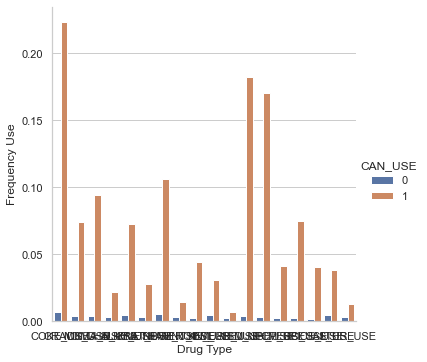

In [355]:
g = sns.catplot(x = 'index',
                y = 0,
                hue = 'CAN_USE',
                kind = 'bar',
                data = drug_freq)
(g.set_axis_labels('Drug Type', 'Frequency Use')
)  

In [392]:
drugColsSome=['COKE_USE','METHAM_USE','KET_USE',
'ALKY_USE','SAL_USE','MDMA_USE','CRACK_USE',
'LSD_USE','STER_USE']

In [393]:
most_freq=US_19.groupby('CAN_USE')[drugColsSome].mean()


In [394]:
yes_can = most_freq.iloc[0].to_frame().reset_index()
yes_can['CAN_USE']=0
yes_can 

,index,0,CAN_USE
0,COKE_USE,0.006814,0
1,METHAM_USE,0.005274,0
2,KET_USE,0.004859,0
3,ALKY_USE,0.004563,0
4,SAL_USE,0.004503,0
5,MDMA_USE,0.003911,0
6,CRACK_USE,0.003674,0
7,LSD_USE,0.003615,0
8,STER_USE,0.003496,0


In [395]:
no_can = most_freq.iloc[1].to_frame().reset_index().rename({1:0},
                                                    axis = 'columns')
no_can['CAN_USE']=1
no_can

,index,0,CAN_USE
0,COKE_USE,0.223513,1
1,METHAM_USE,0.106255,1
2,KET_USE,0.031007,1
3,ALKY_USE,0.072247,1
4,SAL_USE,0.038317,1
5,MDMA_USE,0.094022,1
6,CRACK_USE,0.074402,1
7,LSD_USE,0.182350,1
8,STER_USE,0.012926,1


In [396]:
most_freq=no_can.append(yes_can)
most_freq

,index,0,CAN_USE
0,COKE_USE,0.223513,1
1,METHAM_USE,0.106255,1
2,KET_USE,0.031007,1
3,ALKY_USE,0.072247,1
4,SAL_USE,0.038317,1
5,MDMA_USE,0.094022,1
6,CRACK_USE,0.074402,1
7,LSD_USE,0.182350,1
8,STER_USE,0.012926,1
0,COKE_USE,0.006814,0


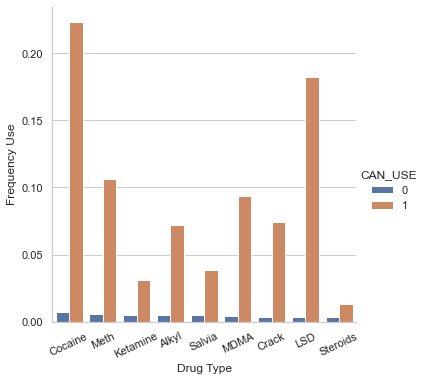

In [407]:
g = sns.catplot(x = 'index',
                y = 0,
                hue = 'CAN_USE',
                kind = 'bar',
                data = most_freq)
(g.set_axis_labels("Drug Type", "Frequency Use")
 .set_xticklabels(['Cocaine','Meth','Ketamine','Alkyl','Salvia','MDMA','Crack','LSD','Steroids'], rotation=25)
)  

In [402]:
mentCols=['MENT_ANYANX','MENT_ADHD','MENT_AUT', 'MENT_BIP',
          'MENT_BPD','MENT_DEP', 'MENT_EAT','MENT_OCD',
          'MENT_PPD', 'MENT_PTSD', 'MENT_SCH','MENT_NONE']
ment_freq=US_19.groupby('CAN_USE')[mentCols].mean()
ment_freq

,MENT_ANYANX,MENT_ADHD,MENT_AUT,MENT_BIP,MENT_BPD,MENT_DEP,MENT_EAT,MENT_OCD,MENT_PPD,MENT_PTSD,MENT_SCH,MENT_NONE
CAN_USE,,,,,,,,,,,,
0,0.119578,0.022695,0.007703,0.019554,0.002844,0.046931,0.008059,0.016947,0.009185,0.020799,0.00397,0.816959
1,0.278372,0.063784,0.008925,0.068939,0.019081,0.120335,0.018081,0.034316,0.017081,0.076325,0.01031,0.619220


In [404]:
yes_ment = ment_freq.iloc[0].to_frame().reset_index()
yes_ment['CAN_USE']=0
yes_ment

,index,0,CAN_USE
0,MENT_ANYANX,0.119578,0
1,MENT_ADHD,0.022695,0
2,MENT_AUT,0.007703,0
3,MENT_BIP,0.019554,0
4,MENT_BPD,0.002844,0
5,MENT_DEP,0.046931,0
6,MENT_EAT,0.008059,0
7,MENT_OCD,0.016947,0
8,MENT_PPD,0.009185,0
9,MENT_PTSD,0.020799,0


In [405]:
no_ment = ment_freq.iloc[1].to_frame().reset_index().rename({1:0},
                                                    axis = 'columns')
no_ment['CAN_USE']=1
no_ment

,index,0,CAN_USE
0,MENT_ANYANX,0.278372,1
1,MENT_ADHD,0.063784,1
2,MENT_AUT,0.008925,1
3,MENT_BIP,0.068939,1
4,MENT_BPD,0.019081,1
5,MENT_DEP,0.120335,1
6,MENT_EAT,0.018081,1
7,MENT_OCD,0.034316,1
8,MENT_PPD,0.017081,1
9,MENT_PTSD,0.076325,1


In [406]:
ment_all=no_ment.append(yes_ment)
ment_all

,index,0,CAN_USE
0,MENT_ANYANX,0.278372,1
1,MENT_ADHD,0.063784,1
2,MENT_AUT,0.008925,1
3,MENT_BIP,0.068939,1
4,MENT_BPD,0.019081,1
5,MENT_DEP,0.120335,1
6,MENT_EAT,0.018081,1
7,MENT_OCD,0.034316,1
8,MENT_PPD,0.017081,1
9,MENT_PTSD,0.076325,1


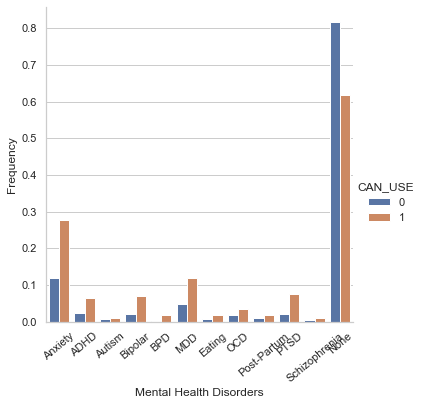

In [411]:
g = sns.catplot(x = 'index',
                y = 0,
                hue = 'CAN_USE',
                kind = 'bar',
                data = ment_all)
(g.set_axis_labels("Mental Health Disorders", "Frequency")
 .set_xticklabels(['Anxiety', 'ADHD', 'Autism', 'Bipolar',
                   'BPD', 'MDD', 'Eating', 'OCD',
                  'Post-Partum', 'PTSD', 'Schizophrenia', 'None'], rotation=40)
)  